# Verwerfungsbereich in Abhängigkeit der Anzahl Messungen

Wir betrachten die Normalverteilungskurve $\mathcal{N}(5,2^2)$ und haben einen festen gemessenen Mittelwert von $\overline{x}_n=6$

Unten sehen wir die Normalverteilungskurve mit einer Messung und Verwerfungsbereich rot eingezeichnet auf Signifikanzniveau $\alpha=0.05$:

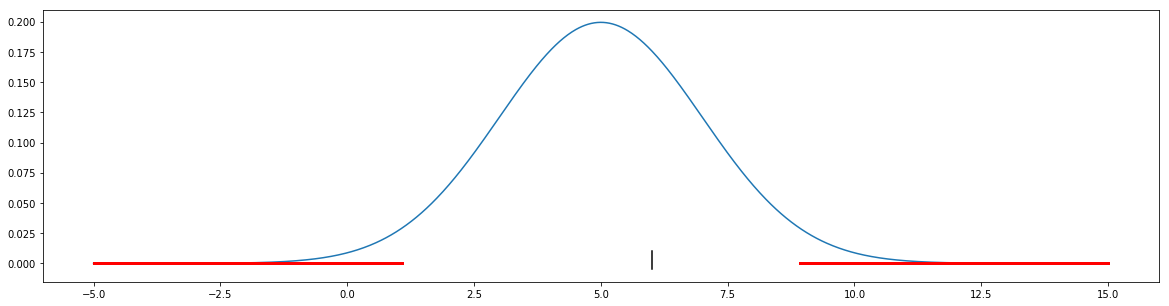

In [15]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.rcParams["figure.figsize"] = (20,5)

# Anzahl Messungen, Wert des Durchschnittes
n = 1
value = 6

# Bereich der x-Achse
aw = -5
ew = 15

# Berechnung der Funktionswerte
mean = 5
sd = 2
x = np.linspace(start=aw, stop=ew, num=1000)
y = norm.pdf(x, loc=mean, scale=sd/np.sqrt(n))

plt.plot(x,y)

#Bestimmung der Quantile
q_025, q_975 = norm.ppf(q=[0.025,0.975], loc=mean , scale=sd/np.sqrt(n))

# Plot des Verwerfungsbereiches
plt.plot([aw, q_025], [0, 0], color="red", linewidth=3)
plt.plot([q_975, ew], [0, 0], color="red", linewidth=3)

plt.plot([value, value], [-0.005, 0.01], color="black")

Der Wert 6 ist nicht im Verwerfungsbereich, also wird die Nullhypothese $\mu_0=5$ nicht verworfen.

Im Weiteren werden wir obige Kurve für verschiedene Anzahl Messungen zeichnen. So macht es Sinn, den obigen Code als Funktion vb_n() zu definieren, wo wir nur noch die Anzahl Messungen eingeben müssen. 

Wichtig ist, dass sich der Wert des Mittelwertes $\overline{x}_n=6$ _nicht_ ändert.

In [21]:
def vb_n(n):
    value = 6
    aw = -5
    ew = 15
    mean = 5
    sd = 2
    
    x = np.linspace(start=aw, stop=ew, num=1000)
    y = norm.pdf(x, loc=mean, scale=sd/np.sqrt(n))
    plt.plot(x,y)

    q_025, q_975 = norm.ppf(q=[0.025,0.975], loc=mean , scale=sd/np.sqrt(n))

    plt.plot([aw, q_025], [0, 0], color="red", linewidth=3)
    plt.plot([q_975, ew], [0, 0], color="red", linewidth=3)

    plt.plot([value, value], [-0.005*np.sqrt(n), 0.01*np.sqrt(n)], color="black")

Wir wählen zuerst $n=4$.

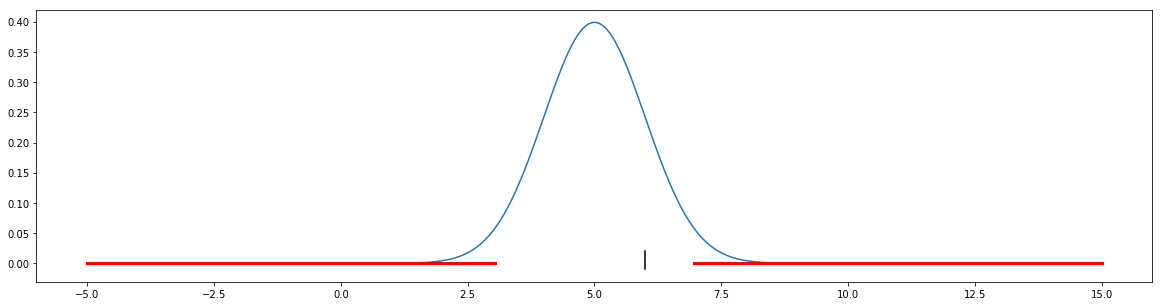

In [22]:
vb_n(4)   

Es fällt auf, dass die Normalverteilungskurve schmaler wird. Dies weil die Standardabweichung $\sigma_{\overline{x}_4}=2/\sqrt{4}=1$ kleiner ist als die Standardabweichung  $\sigma_{\overline{x}_1}=2/\sqrt{1}=2$ vorher. 

Es fällt weiter auf, dass der Verwerfungsbereich grösser wird, beziehungsweise der Bereich, wo nicht verworfen wird, ist kleiner geworden. Oder etwas salopp gesprochen: Der Verwerfungsbereich kommt dem Wert $\overline{x}_n=6$ näher. 

Dieses Verhalten der Verwerfungsbereich geht so weiter, wenn wir $n$ erhöhen.

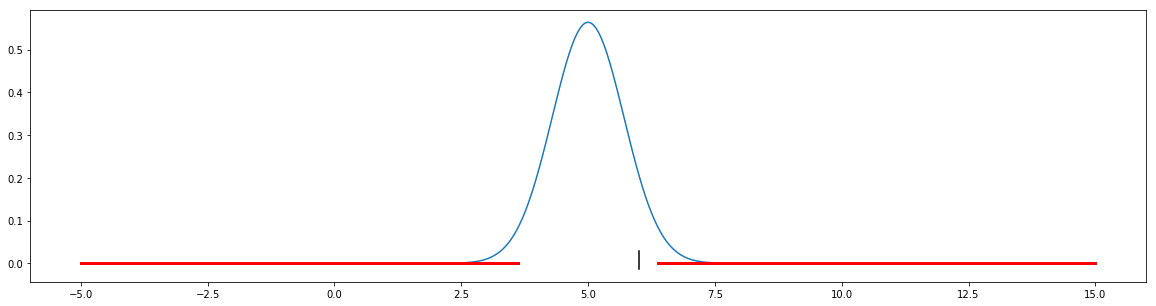

In [18]:
vb_n(8)

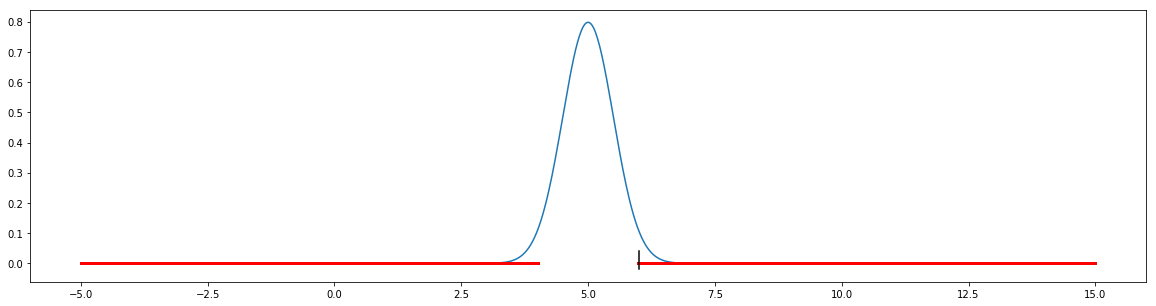

In [19]:
vb_n(16)

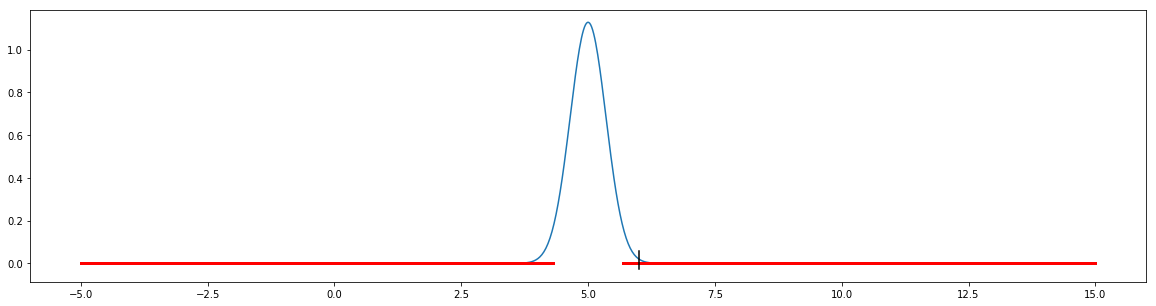

In [20]:
vb_n(32)

Für irgendein $n$ liegt dann $\overline{x}_n=6$ im Verwerfungsbereich. Die Nullhypothese  $\mu_0=5$ wird verworfen. 

Das heisst, für kleines $n$ ist $\overline{x}_n=6$ nicht statistisch signifikant, aber für grosses $n$ schon. 

Oder in anderen Worten: Haben wir sehr viele Messungen, so können schon sehr kleine Abweichungen von $\mu_0$ statistisch signifikant sein. 